In [6]:
import logging
import os
import pathlib
import subprocess
import warnings
from glob import glob

import earthpy.appeears as etapp
import folium
import geopandas as gpd
import hvplot.pandas
import hvplot.xarray
import pandas as pd
import rioxarray as rxr
import xarray as xr


# Set up logging so AppeearsDownloader will log in notebook
logging.basicConfig(level=logging.INFO)

# Ignore FutureWarning coming from hvplot
warnings.simplefilter(action="ignore", category=FutureWarning)

In [7]:
# Generating the path to the project directory

project_dir = os.path.join(
    pathlib.Path.home(), 'earth-analytics', 'data', 'chimney-fire')

#  Create the project directory
os.makedirs(project_dir, exist_ok=True)
project_dir

'/home/jovyan/earth-analytics/data/chimney-fire'

In [8]:
chimney_gdf = gpd.read_file(
    "https://services3.arcgis.com/T4QMspbfLg3qTGWY/arcgis/rest/services"
    "/Historic_Geomac_Perimeters_2016/FeatureServer/0/query?"
    "where=incidentname%20%3D%20'CHIMNEY%20TOPS%202'%20AND%20latest%20%3D%"
    "20'Y'&outFields=*&outSR=4326&f=json"
)
chimney_gdf

,OBJECTID,agency,comments,active,mapmethod,datecurrent,uniquefireidentifier,fireyear,incidentname,pooownerunit,...,state,inciwebid,localincidentidentifier,irwinid,incomplex,complexfirecode,latest,shape__Area,shape__Length,geometry
0,3258,NPS,FIMT,Y,Unknown,1481673600000,2016-TNGSP-016062,2016,CHIMNEY TOPS 2,TNGSP,...,TN,5112,016062,5e4a6146-9645-4e83-94e3-14d090dc4fbd,N,,Y,1.053475e+08,158820.781883,"MULTIPOLYGON (((-83.50445 35.75046, -83.50491 ..."


In [9]:
# Great Smoky Mountains National Park, Sevier County, Tennessee, United States 
# From https://geohack.toolforge.org/geohack.php?pagename=2016_Great_Smoky_Mountains_wildfires&params=35.6289763_N_83.478327_W_dim:30_region:US-TN_type:event&title=2016+Great+Smoky+Mountains+wildfires

chimney_lat = 35.628976
chimney_lon = -83.478327

# Create a Folium map object
m = folium.Map(
    location=[chimney_lat, chimney_lon], 
    zoom_start=11,
    scrollWheelZoom=False,
    tiles='Stamen Watercolor')

# Convert the GeoDataFrame to GeoJSON format
chimney_geojson = chimney_gdf.to_json()

# Add the GeoJSON data to the map as a GeoJson layer
camp_style = {
    "fillColor": "red",
    "color": "black",
    "weight": 2,
    "dashArray": "5, 5",
}
        
folium.GeoJson(
    chimney_geojson,
    style_function=lambda feature: camp_style
    ).add_to(m)


# Add a marker for Chimney Top Mtn
folium.Marker(location=[chimney_lat, chimney_lon]).add_to(m)

# Display the map
m

In [12]:
ndvi_downloader = etapp.AppeearsDownloader(
    download_key='modis-ndvi',
    ea_dir=project_dir,
    product='MYD13Q1.061',
    layer='_250m_16_days_NDVI',
    start_date='06-01',
    end_date='08-31',
    recurring=True,
    year_range=[2014, 2022],
    polygon=chimney_gdf
)

if not os.path.exists(ndvi_downloader.data_dir):
    ndvi_downloader.download_files()

ndvi_downloader

INFO:root:Submitting task request...
INFO:root:Logging into AppEEARS API...
INFO:root:Login successful. Auth Header: Bearer 7H436P6TbMAFc8vd80e-zQ3-zhrPs0mBgYD2ldzgG9XJ_AcUAyJCxjHLePYA8wM9uiM3-zOT3x6TRMbpWf9-bA
INFO:root:task request successfully completed
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:queued
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:32
INFO:root:Submitting status/{task_id} request...
INFO:root:status/{task_id} request successfully completed
INFO:root:60
INFO:ro

In [13]:
ndvi_path_list = glob(os.path.join(
    ndvi_downloader.data_dir, '*', '*NDVI*.tif'))
ndvi_path_list

['/home/jovyan/earth-analytics/data/chimney-fire/modis-ndvi/MYD13Q1.061_2014137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2017169_aid0001.tif',
 '/home/jovyan/earth-analytics/data/chimney-fire/modis-ndvi/MYD13Q1.061_2014137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2022201_aid0001.tif',
 '/home/jovyan/earth-analytics/data/chimney-fire/modis-ndvi/MYD13Q1.061_2014137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2018233_aid0001.tif',
 '/home/jovyan/earth-analytics/data/chimney-fire/modis-ndvi/MYD13Q1.061_2014137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2020217_aid0001.tif',
 '/home/jovyan/earth-analytics/data/chimney-fire/modis-ndvi/MYD13Q1.061_2014137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2018217_aid0001.tif',
 '/home/jovyan/earth-analytics/data/chimney-fire/modis-ndvi/MYD13Q1.061_2014137_to_2022243/MYD13Q1.061__250m_16_days_NDVI_doy2021169_aid0001.tif',
 '/home/jovyan/earth-analytics/data/chimney-fire/modis-ndvi/MYD13Q1.061_2014137_to_2022243/MYD13Q1.061__250m_16_days_N

In [14]:

doy_start = -19
doy_end = -12
scale_factor = 10000

ndvi_da_list = []
for ndvi_path in ndvi_path_list:
    # Get date from file name
    doy = ndvi_path[doy_start:doy_end]
    date = pd.to_datetime(doy, format='%Y%j')

    # Open dataset
    da = rxr.open_rasterio(ndvi_path, masked=True).squeeze()

    # Prepare to concatenate: Add date dimension and clean up metadata
    da = da.assign_coords({'date': date})
    da = da.expand_dims({'date': 1})
    da.name = 'NDVI'

    # Divide by scale factor
    da = da / scale_factor

    # Add the DataArray to the end of the accumulator list
    ndvi_da_list.append(da)

ndvi_da_list

[<xarray.DataArray 'NDVI' (date: 1, y: 91, x: 77)>
 array([[[0.8208, 0.8299, 0.8392, ..., 0.8493, 0.8217, 0.8573],
         [0.8258, 0.8258, 0.8258, ..., 0.8217, 0.8217, 0.8217],
         [0.7964, 0.8235, 0.8235, ..., 0.8071, 0.8071, 0.8071],
         ...,
         [0.7086, 0.6776, 0.6496, ..., 0.9074, 0.9074, 0.9074],
         [0.7242, 0.7242, 0.4192, ..., 0.9074, 0.9074, 0.9074],
         [0.7386, 0.6571, 0.6571, ..., 0.9011, 0.9011, 0.9075]]],
       dtype=float32)
 Coordinates:
     band         int64 1
   * x            (x) float64 -83.62 -83.62 -83.62 ... -83.47 -83.47 -83.46
   * y            (y) float64 35.81 35.81 35.81 35.8 ... 35.63 35.63 35.62 35.62
     spatial_ref  int64 0
   * date         (date) datetime64[ns] 2017-06-18,
 <xarray.DataArray 'NDVI' (date: 1, y: 91, x: 77)>
 array([[[0.8192, 0.8514, 0.8778, ..., 0.859 , 0.8678, 0.8572],
         [0.8009, 0.8009, 0.8336, ..., 0.8808, 0.8808, 0.8307],
         [0.8144, 0.8345, 0.8345, ..., 0.8804, 0.8225, 0.8225],
         

In [15]:
ndvi_ds = xr.combine_by_coords(ndvi_da_list, coords=['date'])
ndvi_ds

<xarray.Dataset>
Dimensions:      (x: 77, y: 91, date: 61)
Coordinates:
    band         int64 1
  * x            (x) float64 -83.62 -83.62 -83.62 ... -83.47 -83.47 -83.46
  * y            (y) float64 35.81 35.81 35.81 35.8 ... 35.63 35.63 35.62 35.62
    spatial_ref  int64 0
  * date         (date) datetime64[ns] 2014-05-17 2014-06-02 ... 2022-08-21
Data variables:
    NDVI         (date, y, x) float32 0.7595 0.769 0.7647 ... 0.8884 0.8874

<function matplotlib.pyplot.show(close=None, block=None)>

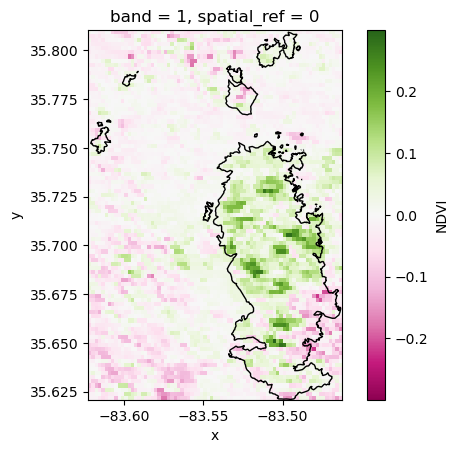

In [17]:
import matplotlib.pyplot as plt

# Calculate the change in NDVI pre- and post-fire
dndvi_da = (ndvi_ds
    .sel(date='2019')
    .mean('date')
    .NDVI
- ndvi_ds
    .sel(date='2017')
    .mean('date')
    .NDVI
)

dndvi_da.plot(cmap=plt.colormaps['PiYG'])
chimney_gdf.plot(facecolor='none', ax=plt.gca())


plt.show


In [21]:
# Get the area outside the fire boundary
out_gdf = (
    gpd.GeoDataFrame(geometry=chimney_gdf.envelope)
    .overlay(chimney_gdf, how="difference")
)
out_gdf

,geometry
0,"MULTIPOLYGON (((-83.62116 35.62100, -83.62116 ..."


In [22]:
ndvi_fire_ds = ndvi_ds.rio.clip(chimney_gdf.geometry)
ndvi_out_ds = ndvi_ds.rio.clip(out_gdf.geometry)

In [23]:
ndvi_fire_df = (
    ndvi_fire_ds
    .groupby(ndvi_fire_ds.date.dt.year)
    .mean(...)
    .NDVI
    .to_dataframe()[['NDVI']])
ndvi_out_df = (
    ndvi_out_ds
    .groupby(ndvi_out_ds.date.dt.year)
    .mean(...)
    .NDVI
    .to_dataframe()[['NDVI']])

ndvi_fire_df,ndvi_out_df

(          NDVI
 year          
 2014  0.840268
 2015  0.849227
 2016  0.868071
 2017  0.764203
 2018  0.775253
 2019  0.807712
 2020  0.807797
 2021  0.802346
 2022  0.837765,
           NDVI
 year          
 2014  0.838072
 2015  0.834733
 2016  0.853279
 2017  0.851028
 2018  0.839062
 2019  0.842001
 2020  0.822916
 2021  0.846839
 2022  0.842259)

In [24]:
(ndvi_fire_df - ndvi_out_df).hvplot(
    xlabel='Year', 
    ylabel='dNDVI',
    title='Difference in NDVI between the inside and outside of the Chimeny Top 2 fire boundary'
)

:Curve   [year]   (NDVI)

In [27]:
%%capture
%%bash
jupyter nbconvert chimney_tops_2.ipynb --to html --no-input